# Hyper Parameter Optimization (HPO) Result Analysis-1

## Import libraries

In [1]:
# import basic libraries
import math
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
import pandas as pd
import random as rd
from random import choices
import numpy as np

# import seaborn as sns
import plotly.graph_objects as go

# import linear and polynomial regression sklearn libraries
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

## Load and prepare tuner logs

In [2]:
#load tuner 1 and tuner 2 logs
Tuner1 = pd.read_csv('log5.csv')
Tuner2 = pd.read_csv('log6.csv')
#Covert tuner lgos in to numpy array
HPO1 = np.array(Tuner1)
HPO2 = np.array(Tuner2)
# create index for epochs
index1 = np.array(range(1,101))
#concatenate tuner 1 and tuner 2 logs
HPO = np.concatenate((HPO1, HPO2),axis=0)

## Summary of tuner trials

In [3]:
# load tuner data (summary of tuner trails)
Tuner1 = pd.read_csv('tune_data.csv')
Tuner1

Score  Input layer units  Number of hidden layers  \
0   0.832580                 40                        2   
1   0.830988                 70                        2   
2   0.832663                190                        3   
3   0.833333                 20                        1   
4   0.833668                150                        1   
5   0.832580                 10                        3   
6   0.832580                190                        1   
7   0.832663                190                        3   
8   0.832328                 30                        1   
9   0.833668                190                        2   
10  0.834506                 10                        1   
11  0.831575                200                        3   
12  0.832328                 20                        3   
13  0.834673                150                        1   
14  0.831910                160                        3   
15  0.833417                130                        1   
16  0.831742                180                        3   
17  0.833417                 10                        1   
18  0.830737                 50                        3   
19  0.831742                 50                        1   
20  0.832245                 50                        1   
21  0.834004                 30                        1   
22  0.833920                190                        1   
23  0.833752                190                        2   
24  0.833501                 10                        3   
25  0.833417                 10                        1   
26  0.835511                100                        0   
27  0.835008                100                        0   
28  0.834673                 90                        0   
29  0.834171                100                        0   
30  0.834087                 80                        0   
31  0.834003                100                        0   
32  0.833920                100                        0   
33  0.833166                100                        0   
34  0.825209                 10                        0   
35  0.821189                 10                        0   
36  0.834590                100                        0   
37  0.834339                200                        0   
38  0.834255                100                        0   
39  0.834255                200                        0   
40  0.834171                180                        0   
41  0.834087                100                        0   
42  0.834003                200                        0   
43  0.834003                130                        0   
44  0.833836                100                        0   
45  0.833166                200                        0   

    Hidden layer 1 number of units  Hidden layer 2 number of units  \
0                               10                             200   
1                              190                              50   
2                              130                              10   
3                              200                               0   
4                              100                               0   
5                               60                             140   
6                               10                               0   
7                               70                             200   
8                               20                               0   
9                              180                             200   
10                             170                               0   
11                             130                              10   
12                             200                             160   
13                             170                               0   
14                              10                             170   
15                              80                               0

In [4]:
Tuner = np.array(Tuner1)

In [5]:
index = np.array(range(1,47))

## Visualize objective function variation during tunning process

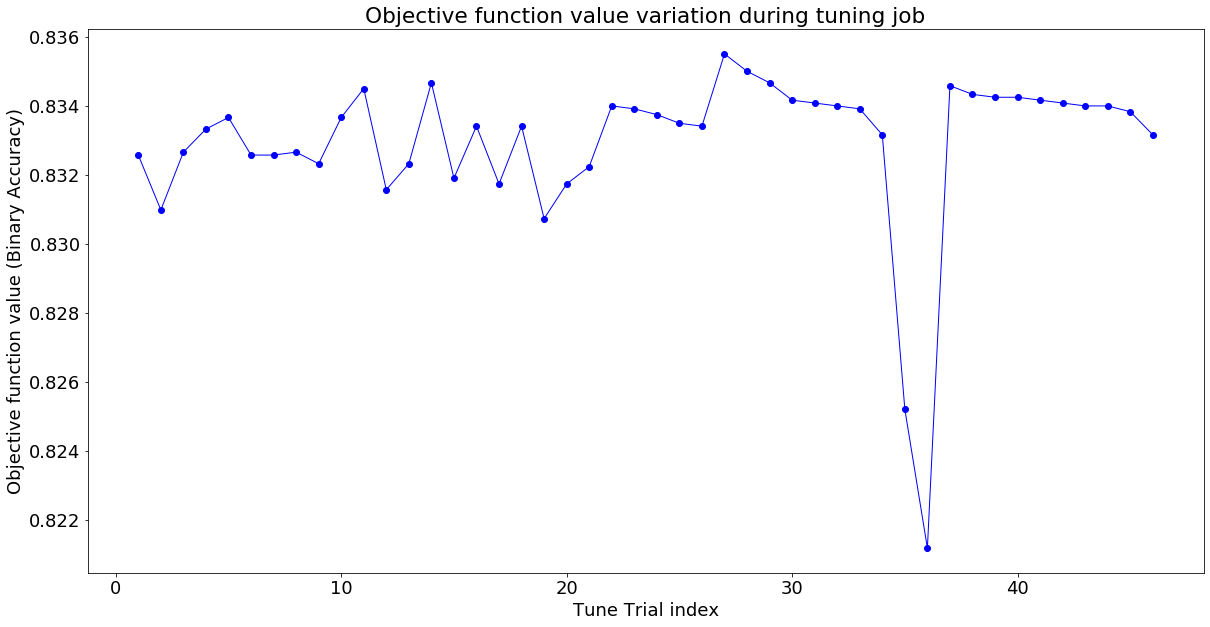

In [6]:
plt.rcParams['figure.figsize']=(20,10)
font ={'size':18}
plt.rc('font',**font)
plt.plot(index, Tuner[:,0],'o-',lw=1,c='blue')
plt.title('Objective function value variation during tuning job')
plt.ylabel('Objective function value (Binary Accuracy)')
plt.xlabel('Tune Trial index')
plt.show()

## Visualize Mean Squad Error (MSE) and Binary accuracy variation of tuner trials 

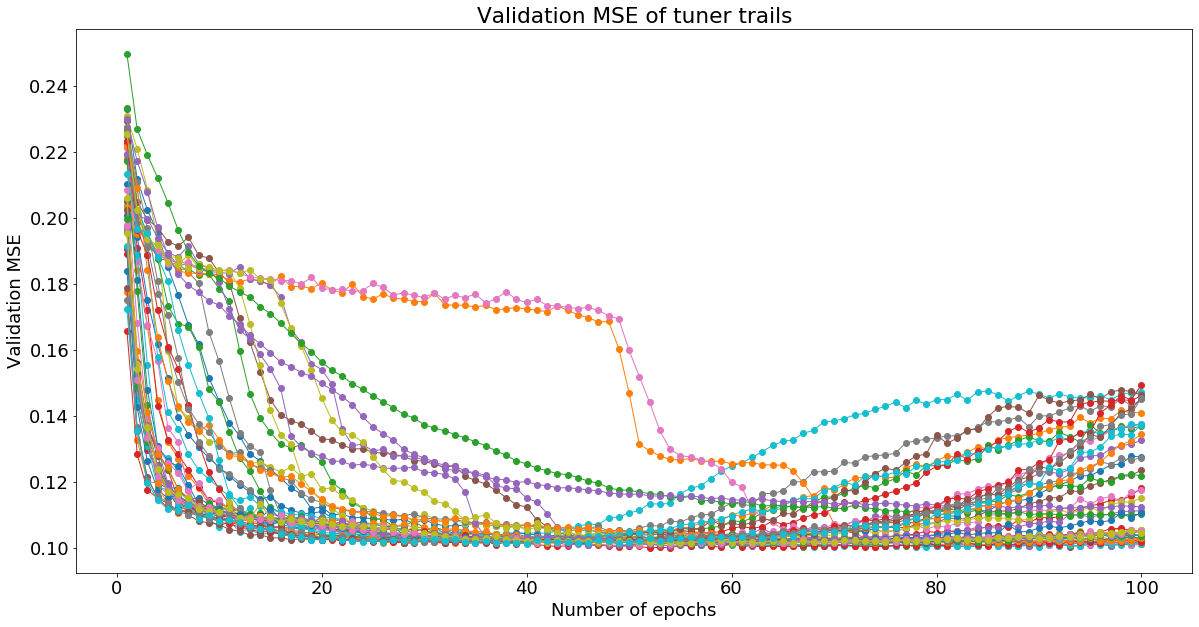

In [7]:
plt.rcParams['figure.figsize']=(20,10)
font ={'size':18}
plt.rc('font',**font)
for i in range(1,51):
    plt.plot(index1, HPO[100*(i-1):100*i:1,4],'o-',lw=1)
plt.title('Validation MSE of tuner trails')
plt.ylabel('Validation MSE')
plt.xlabel('Number of epochs')
plt.show()

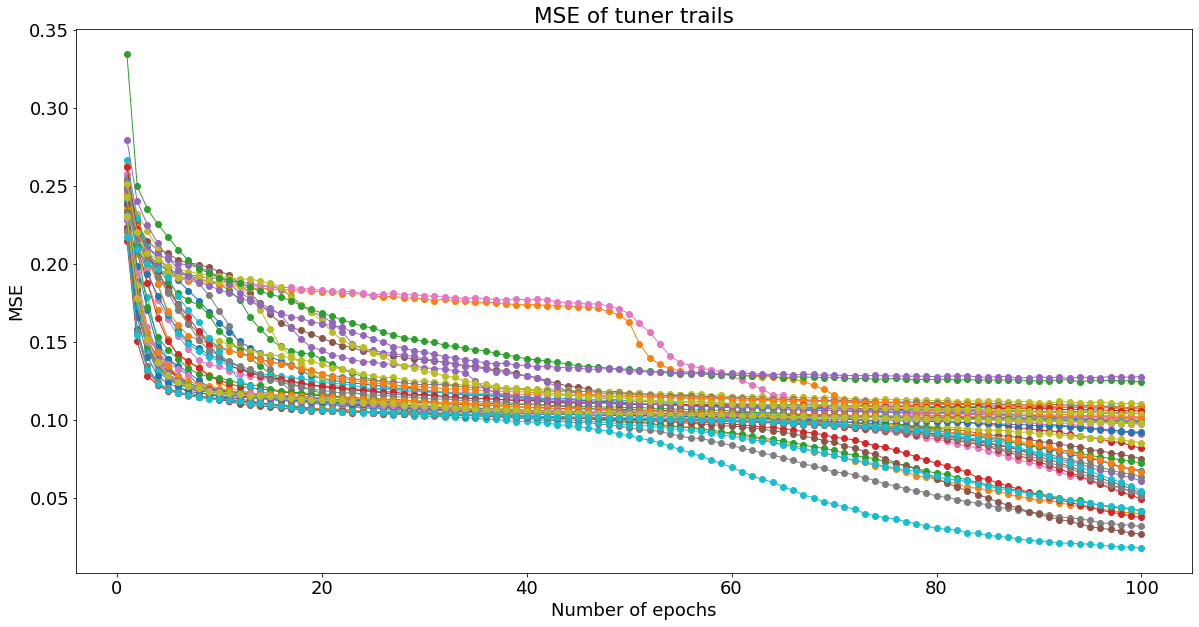

In [8]:
plt.rcParams['figure.figsize']=(20,10)
font ={'size':18}
plt.rc('font',**font)
for i in range(1,51):
    plt.plot(index1, HPO[100*(i-1):100*i:1,2],'o-',lw=1)
plt.title('MSE of tuner trails')
plt.ylabel('MSE')
plt.xlabel('Number of epochs')
plt.show()

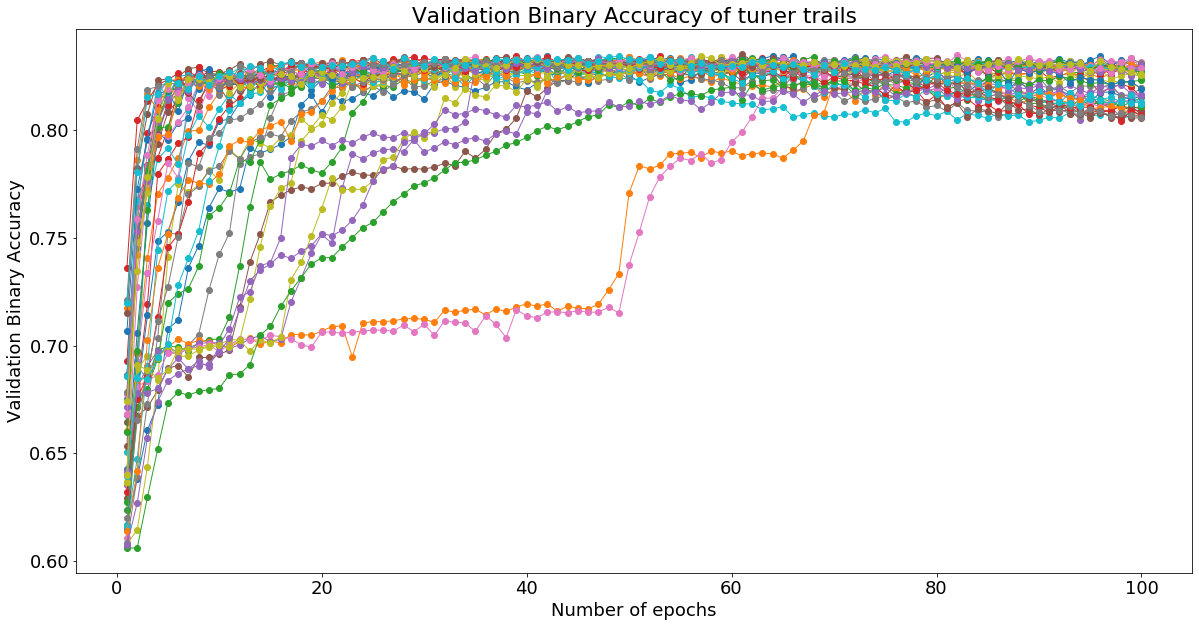

In [9]:
plt.rcParams['figure.figsize']=(20,10)
font ={'size':18}
plt.rc('font',**font)
for i in range(1,51):
    plt.plot(index1, HPO[100*(i-1):100*i:1,3],'o-',lw=1)
plt.title('Validation Binary Accuracy of tuner trails')
plt.ylabel('Validation Binary Accuracy')
plt.xlabel('Number of epochs')
plt.show()

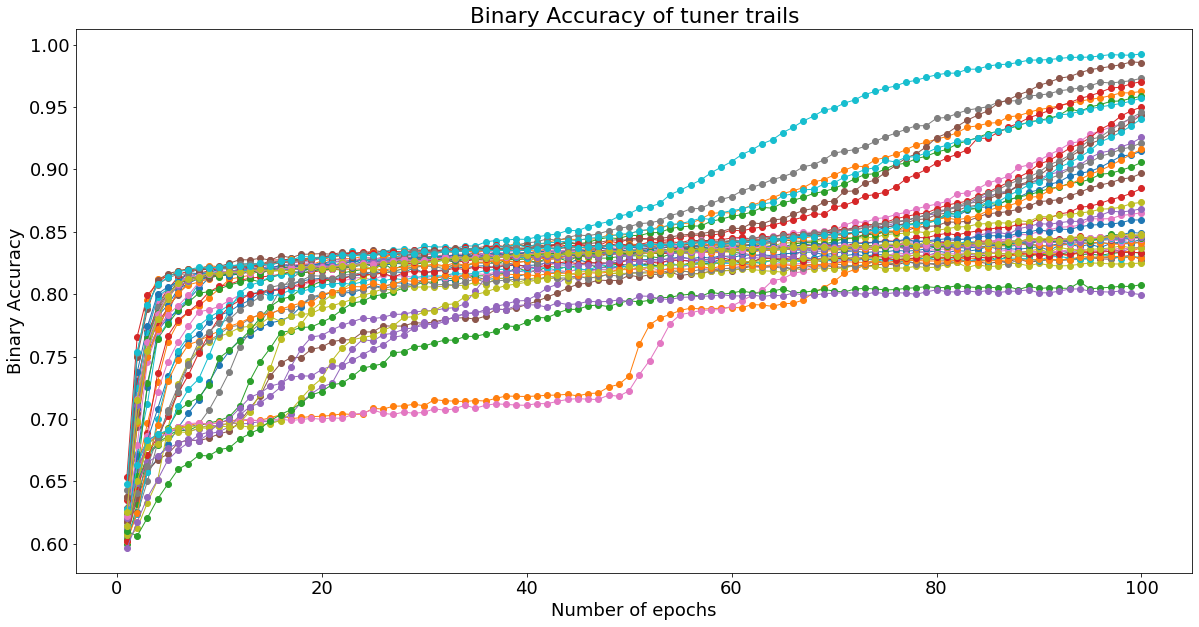

In [10]:
plt.rcParams['figure.figsize']=(20,10)
font ={'size':18}
plt.rc('font',**font)
for i in range(1,51):
    plt.plot(index1, HPO[100*(i-1):100*i:1,1],'o-',lw=1)
plt.title('Binary Accuracy of tuner trails')
plt.ylabel('Binary Accuracy')
plt.xlabel('Number of epochs')
plt.show()

## Analysis the statistical parameters of objective function values of tuner trials

In [11]:
Input_Units1 = Tuner1.groupby("Input layer units")['Score'].describe()
No_Hidden_Layer1 = Tuner1.groupby("Number of hidden layers")['Score'].describe()

In [12]:
Input_Units1

count      mean       std       min       25%       50%  \
Input layer units                                                            
10                   7.0  0.830546  0.005181  0.821189  0.828895  0.833417   
20                   2.0  0.832831  0.000711  0.832328  0.832580  0.832831   
30                   2.0  0.833166  0.001185  0.832328  0.832747  0.833166   
40                   1.0  0.832580       NaN  0.832580  0.832580  0.832580   
50                   3.0  0.831575  0.000768  0.830737  0.831240  0.831742   
70                   1.0  0.830988       NaN  0.830988  0.830988  0.830988   
80                   1.0  0.834087       NaN  0.834087  0.834087  0.834087   
90                   1.0  0.834673       NaN  0.834673  0.834673  0.834673   
100                 10.0  0.834255  0.000652  0.833166  0.833941  0.834129   
130                  2.0  0.833710  0.000415  0.833417  0.833564  0.833710   
150                  2.0  0.834171  0.000711  0.833668  0.833920  0.834171   
160                  1.0  0.831910       NaN  0.831910  0.831910  0.831910   
180                  2.0  0.832956  0.001717  0.831742  0.832349  0.832956   
190                  6.0  0.833208  0.000633  0.832580  0.832663  0.833166   
200                  5.0  0.833467  0.001155  0.831575  0.833166  0.834003   

                        75%       max  
Input layer units                      
10                 0.833459  0.834506  
20                 0.833082  0.833333  
30                 0.833585  0.834004  
40                 0.832580  0.832580  
50                 0.831993  0.832245  
70                 0.830988  0.830988  
80                 0.834087  0.834087  
90                 0.834673  0.834673  
100                0.834506  0.835511  
130                0.833857  0.834003  
150                0.834422  0.834673  
160                0.831910  0.831910  
180                0.833564  0.834171  
190                0.833731  0.833920  
200                0.834255  0.834339

In [13]:
No_Hidden_Layer1

count      mean       std       min       25%  \
Number of hidden layers                                                  
0                         20.0  0.833082  0.003482  0.821189  0.833899   
1                         13.0  0.833327  0.000885  0.831742  0.832580   
2                          4.0  0.832747  0.001288  0.830988  0.832182   
3                          9.0  0.832189  0.000799  0.830737  0.831742   

                              50%       75%       max  
Number of hidden layers                                
0                        0.834087  0.834276  0.835511  
1                        0.833417  0.833920  0.834673  
2                        0.833124  0.833689  0.833752  
3                        0.832328  0.832663  0.833501

The minimum, mean and maximum objective function values for different number of hidden layers and input layers units has been stored as NumPy arrays.

In [14]:
mean_Input_Units1 = Input_Units1.iloc[: , 1].values
min_Input_Units1 = Input_Units1.iloc[: , 3].values
max_Input_Units1 = Input_Units1.iloc[: , 7].values

mean_No_Hidden_Layer1 = No_Hidden_Layer1.iloc[: , 1].values
min_No_Hidden_Layer1 = No_Hidden_Layer1.iloc[: , 3].values
max_No_Hidden_Layer1 = No_Hidden_Layer1.iloc[: , 7].values

Tuner = np.array(Tuner1)
index = np.array(range(1,47))

Tuner_score = Tuner[:,0]
Input_Units = Tuner[:,1]
No_Hidden_Layer = Tuner[:,2]

## Build Polynomial regression model

In [15]:
X = np.unique(Tuner[:,1])
X = X.reshape(-1,1)
poly_reg = PolynomialFeatures(degree = 10)
X_poly = poly_reg.fit_transform(X)
poly_reg.fit(X_poly, mean_Input_Units1)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, mean_Input_Units1)
X_grid = np.arange(min(X), max(X)+1, 1)
X_grid = X_grid.reshape((len(X_grid), 1))
X_grid = X_grid.astype('float')

A = lin_reg_2.predict(poly_reg.fit_transform(X_grid))
X_grid = X_grid.flatten() 

## Variation of Binary Accuracy against Number of Input Layer units

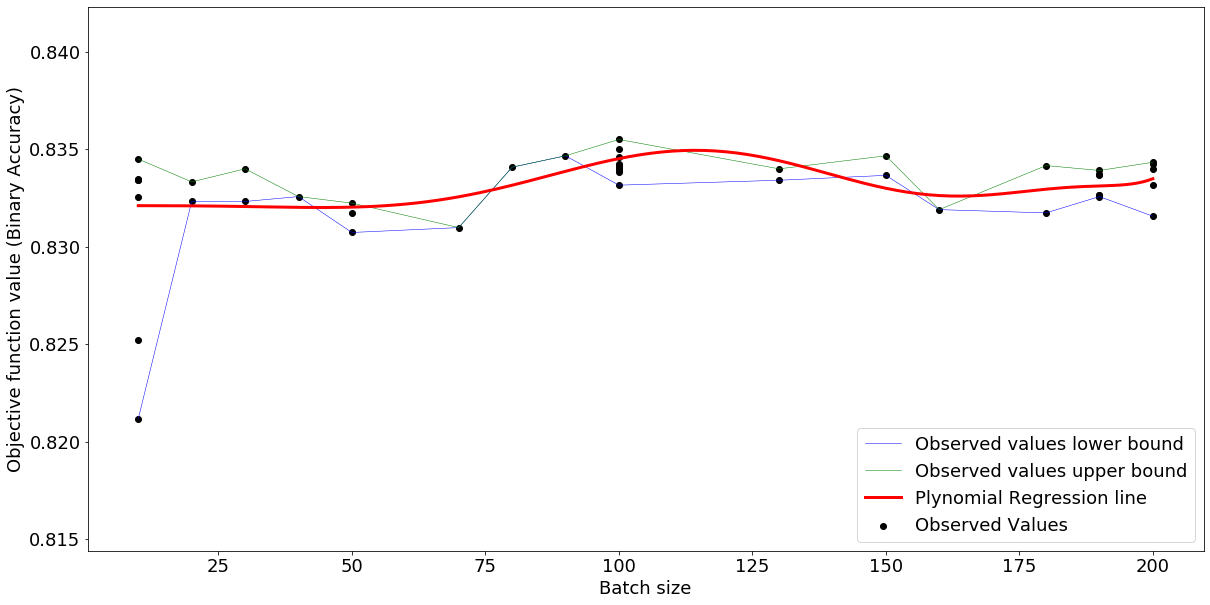

In [16]:
plt.rcParams['figure.figsize']=(20,10)
font ={'size':18}
plt.rc('font',**font)
plt.scatter(Input_Units, Tuner_score, c= 'black')
plt.plot(np.unique(Input_Units),min_Input_Units1,lw=0.5,c='blue')
plt.plot(np.unique(Input_Units),max_Input_Units1,lw=0.5,c='green')
plt.plot(X_grid, A, color = 'red',lw=3)
#plt.title('Variation of Binary Accuracy against Number of Input Layer units')
plt.ylabel('Objective function value (Binary Accuracy)')
plt.xlabel('Batch size')
plt.legend(['Observed values lower bound','Observed values upper bound','Plynomial Regression line','Observed Values'], loc='lower right')
plt.show()

In [17]:
X = np.unique(Tuner[:,2])
X = X.reshape(-1,1)
poly_reg = PolynomialFeatures(degree = 10)
X_poly = poly_reg.fit_transform(X)
poly_reg.fit(X_poly, mean_No_Hidden_Layer1)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, mean_No_Hidden_Layer1)
X_grid = np.arange(min(X), max(X)+1, 1)
X_grid = X_grid.reshape((len(X_grid), 1))
X_grid = X_grid.astype('float')

A = lin_reg_2.predict(poly_reg.fit_transform(X_grid))
X_grid = X_grid.flatten() 

## Variation of Binary Accuracy against Number of Hidden Layers

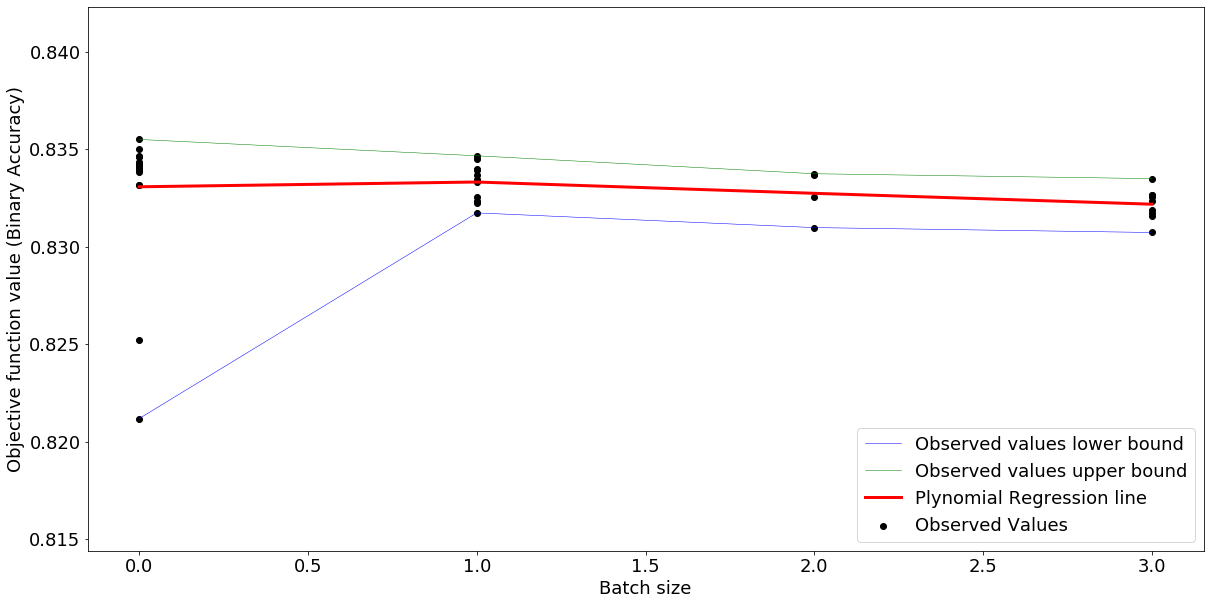

In [18]:
plt.rcParams['figure.figsize']=(20,10)
font ={'size':18}
plt.rc('font',**font)
plt.scatter(No_Hidden_Layer, Tuner_score, c= 'black')
plt.plot(np.unique(No_Hidden_Layer),min_No_Hidden_Layer1,lw=0.5,c='blue')
plt.plot(np.unique(No_Hidden_Layer),max_No_Hidden_Layer1,lw=0.5,c='green')
plt.plot(X_grid, A, color = 'red',lw=3)
#plt.title('Variation of Binary Accuracy against Number of Hidden Layers')
plt.ylabel('Objective function value (Binary Accuracy)')
plt.xlabel('Batch size')
plt.legend(['Observed values lower bound','Observed values upper bound','Plynomial Regression line','Observed Values'], loc='lower right')
plt.show()

## Comparison between initial model and tuned model Mean Squad Error (MSE) variation during training process

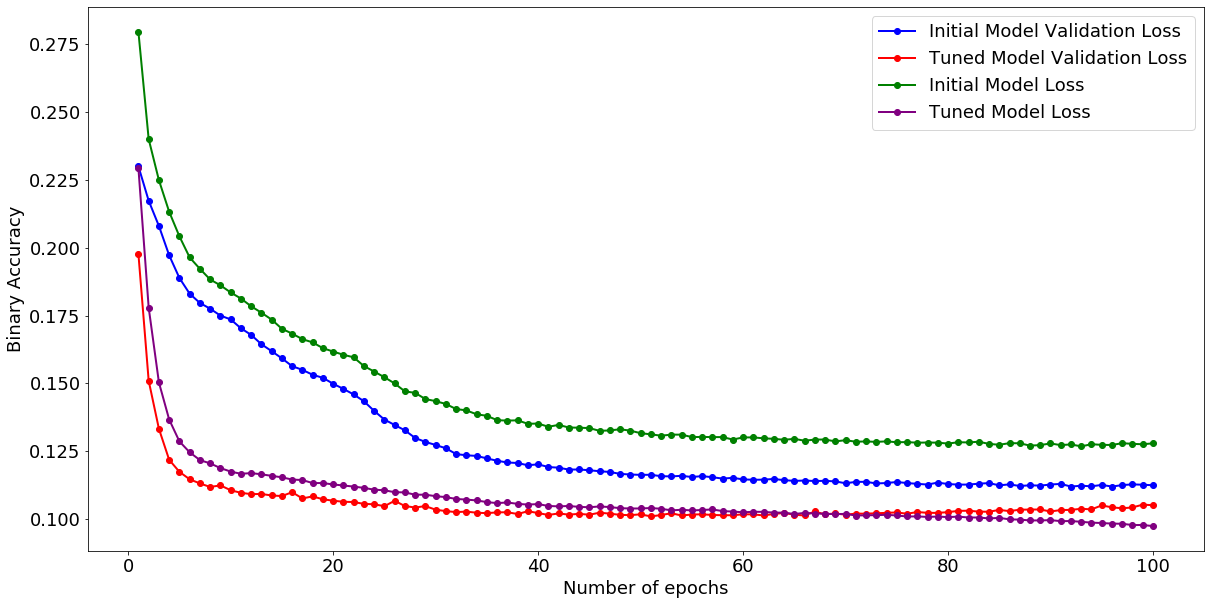

In [19]:
plt.rcParams['figure.figsize']=(20,10)
font ={'size':18}
plt.rc('font',**font)
plt.plot(index1,HPO[3400:3500:1,4],'o-',lw=2,c='blue')
plt.plot(index1,HPO[4600:4700:1,4],'o-',lw=2,c='red')
plt.plot(index1,HPO[3400:3500:1,2],'o-',lw=2,c='green')
plt.plot(index1,HPO[4600:4700:1,2],'o-',lw=2,c='purple')
plt.ylabel('Binary Accuracy')
plt.xlabel('Number of epochs')
plt.legend(['Initial Model Validation Loss','Tuned Model Validation Loss','Initial Model Loss','Tuned Model Loss'], loc='upper right')
plt.show()

## Comparison between initial model and tuned model binary accuracy variation during training process

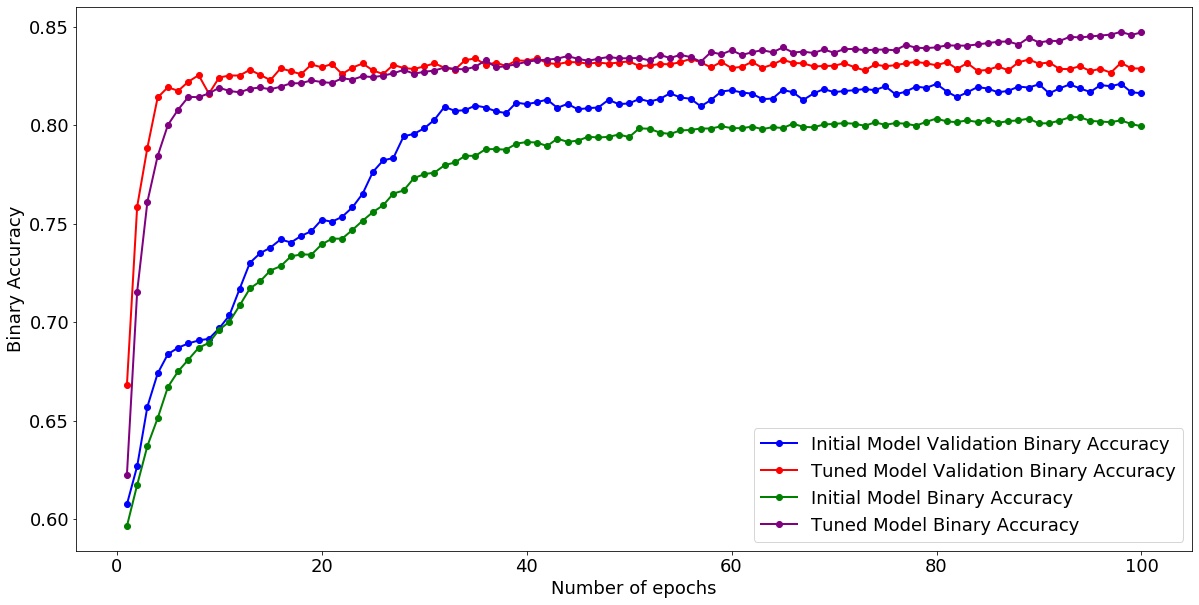

In [20]:
plt.rcParams['figure.figsize']=(20,10)
font ={'size':18}
plt.rc('font',**font)
plt.plot(index1,HPO[3400:3500:1,3],'o-',lw=2,c='blue')
plt.plot(index1,HPO[4600:4700:1,3],'o-',lw=2,c='red')
plt.plot(index1,HPO[3400:3500:1,1],'o-',lw=2,c='green')
plt.plot(index1,HPO[4600:4700:1,1],'o-',lw=2,c='purple')
plt.ylabel('Binary Accuracy')
plt.xlabel('Number of epochs')
plt.legend(['Initial Model Validation Binary Accuracy','Tuned Model Validation Binary Accuracy','Initial Model Binary Accuracy',
            'Tuned Model Binary Accuracy'], loc='lower right')
plt.show()

## Code to get plotly graphs
Plots get form this plotly library not appear after notebook convert to pdf. Therfore this graphs has include to report from figure 3.8 to 3.18.

In [21]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=index, y= HPO[3400:3500:1,4],mode='lines',
                    line=dict( width=1),name ='1' ))

fig.add_trace(go.Scatter(x=index, y= HPO[4600:4700:1,4],mode='lines',
                    line=dict( width=1),name ='2' ))
fig.add_trace(go.Scatter(x=index, y= HPO[3400:3500:1,2],mode='lines+markers',
                    line=dict( width=1),name ='3' ))

fig.add_trace(go.Scatter(x=index, y= HPO[4600:4700:1,2],mode='lines+markers',
                    line=dict( width=1),name ='4' ))

fig.update_layout(
    autosize=False,
    width=1000,
    height=650)

fig.update_layout(
    xaxis_title="Number of epochs",
    yaxis_title="Binary Accuracy",
    font=dict(
        family="Times New Roman",
        size=20,
        color="#000000"
    ))
    


fig.show()